In [88]:
import pandas as pd
import numpy as np

In [95]:
df=pd.read_csv("StressLevelDataset.csv",usecols=["anxiety_level","self_esteem","mental_health_history","depression","sleep_quality","academic_performance","study_load","future_career_concerns","stress_level"])
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,sleep_quality,academic_performance,study_load,future_career_concerns,stress_level
0,14,20,0,11,2,3,2,3,1
1,15,8,1,15,1,1,4,5,2
2,12,18,1,14,2,2,3,2,1
3,16,12,1,15,1,2,4,4,2
4,16,28,0,7,5,4,3,2,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   anxiety_level           1100 non-null   int64
 1   self_esteem             1100 non-null   int64
 2   mental_health_history   1100 non-null   int64
 3   depression              1100 non-null   int64
 4   sleep_quality           1100 non-null   int64
 5   academic_performance    1100 non-null   int64
 6   study_load              1100 non-null   int64
 7   future_career_concerns  1100 non-null   int64
 8   stress_level            1100 non-null   int64
dtypes: int64(9)
memory usage: 77.5 KB


In [97]:
df.isnull().sum()

anxiety_level             0
self_esteem               0
mental_health_history     0
depression                0
sleep_quality             0
academic_performance      0
study_load                0
future_career_concerns    0
stress_level              0
dtype: int64

In [98]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,sleep_quality,academic_performance,study_load,future_career_concerns,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.660000,2.772727,2.621818,2.649091,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.548383,1.414594,1.315781,1.529375,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,4.000000,4.000000,3.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

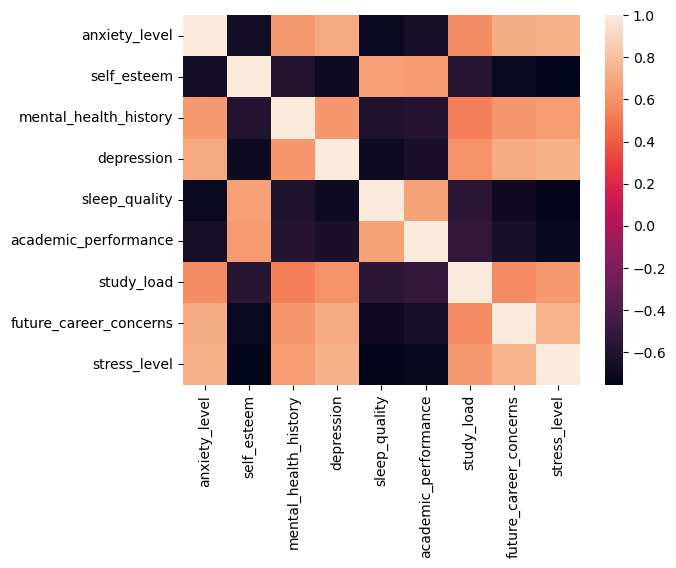

In [100]:
 sns.heatmap(df.corr())

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [102]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [104]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [105]:
rf=RandomForestClassifier(n_estimators=1000,criterion="gini")
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [107]:
y_pred=rf.predict(x_test)

In [108]:
score=accuracy_score(y_pred,y_test)
print("Accuracy score:",score)

Accuracy score: 0.8590909090909091


In [110]:
import pickle 
pickle_out = open("rudra1.pkl", "wb") 
pickle.dump(rf, pickle_out) 
pickle_out.close()

In [111]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'sleep_quality', 'academic_performance', 'study_load',
       'future_career_concerns', 'stress_level'],
      dtype='object')

In [113]:
df.sample(5)

,anxiety_level,self_esteem,mental_health_history,depression,sleep_quality,academic_performance,study_load,future_career_concerns,stress_level
818,13,16,1,13,2,3,2,3,1
561,14,16,0,12,3,2,3,2,1
540,19,14,1,24,1,1,5,4,2
988,21,8,1,21,1,2,5,5,2
170,4,25,0,6,4,5,1,1,0
